In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
plt.rcParams.update({'font.size': 14})

In [2]:
df= pd.read_csv("covid.csv",parse_dates=['Date'])
df[['Date','New Cases']].tail()

,Date,New Cases
41,2020-04-18,306
42,2020-04-19,312
43,2020-04-20,492
44,2020-04-21,434
45,2020-04-22,390


/home/farhad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


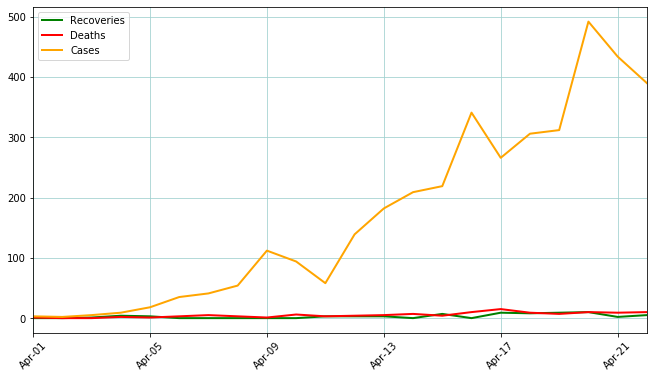

In [3]:

myFmt = mdates.DateFormatter('%b-%d')

fig, ax = plt.subplots(figsize=(11, 6))

Date=df['Date']
NR=df['New Recoveries']
NC=df['New Cases']
ND=df['New Deaths']

ax.xaxis.set_major_formatter(myFmt)
ax.plot(Date,NR,linewidth=2,color="green",label="Recoveries")
ax.plot(Date,ND,linewidth=2,color="red",label="Deaths")
ax.plot(Date,NC,linewidth=2,color="orange",label="Cases")
ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 4, 22)])
plt.xticks(rotation=45)
plt.grid(color='#a1d1d0')
plt.legend()
plt.savefig("chart1.png", bbox_inches="tight", pad_inches=1)
plt.show()
plt.close()

In [4]:
active_cases=df['Total Cases'].max()-df['Total Deaths'].max()-df['Total Recoveries'].max()
exp_vals = [active_cases,df['Total Deaths'].max(),df['Total Recoveries'].max()]
exp_labels = ["Active Cases","Deaths","Recovered"]

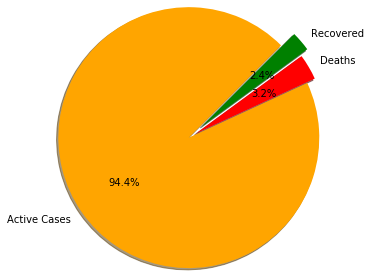

In [5]:
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True,colors=["orange","red","green"],
        autopct='%1.1f%%',radius=1.5,explode=[0,0.1,0.2],counterclock=True, startangle=45)

plt.savefig("piechart1.png", bbox_inches="tight", pad_inches=1, transparent=False)
plt.show()
plt.close()

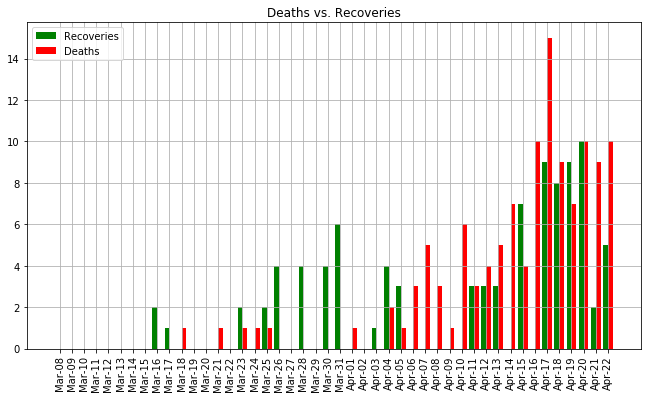

In [6]:
fig= plt.figure(figsize=(11,6))

xpos = np.arange(len(df))
xpos

Date=[date_obj.strftime('%b-%d') for date_obj in df['Date']]
NR=df['New Recoveries']
ND=df['New Deaths']


plt.bar(xpos-0.2,NR,width=0.4,color="green",label="Recoveries")
plt.bar(xpos+0.2,ND,width=0.4,color="red",label="Deaths")

plt.xticks(xpos,Date,rotation=90)
plt.title("Deaths vs. Recoveries")
plt.grid()
plt.legend()
plt.savefig("chart2.png", bbox_inches="tight", pad_inches=1)
plt.show()
plt.close()

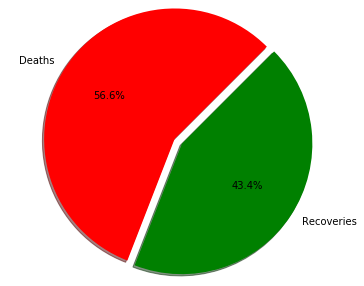

In [7]:
plt.axis("equal")
plt.pie([df['Total Deaths'].max(),df['Total Recoveries'].max()],labels=["Deaths","Recoveries"], shadow=True,colors=["red","green"],
        autopct='%1.1f%%',radius=1.5,explode=[0,0.1],counterclock=True, startangle=45)


plt.savefig("piechart2.png", bbox_inches="tight", pad_inches=1, transparent=False)
plt.show()
plt.close()

Deaths Vs. Recoveries